In [4]:
import pandas as pd
#list with weekly precipitation
rain = open('daily_precipitation.csv','r')
rain_data = rain.read()
rows = rain_data.split("\n")
daily_rainfall = []
weekly_rainfall_list = []
yesterdays_rainfall = []
threeday_rainfall = []
dates = []

#rainfall and dates
for row in rows[1:]:
    values = row.split(',')
    precipitation = (values[2].split(';'))
    if len(precipitation) > 1:
        x = float(precipitation[1])
        daily_rainfall.append(x)
        dates.append(values[1])


#weekly rainfall
for index, value in enumerate(daily_rainfall[0:len(daily_rainfall)]):
    start_week = index - 7
    end_week = index - 1
    if start_week < 0:
        x = float(0)
        weekly_rainfall_list.append(x)
        continue
    weekly_rainfall = 0
    for i in daily_rainfall[start_week:end_week]:
        weekly_rainfall += i
    weekly_rainfall_list.append(weekly_rainfall)
print (len(daily_rainfall), len(weekly_rainfall_list))

#threeday rainfall
for index, value in enumerate(daily_rainfall[0:len(daily_rainfall)]):
    start_day = index - 3
    end_day = index - 1
    if start_day < 0:
        x = float(0)
        threeday_rainfall.append(x)
        continue
    counter = 0
    for i in daily_rainfall[start_day:end_day]:
        counter += i
    threeday_rainfall.append(counter)
print (len(threeday_rainfall))

#previous day's rainfall
for index, value in enumerate(daily_rainfall[0:len(daily_rainfall)]):
    previous_day = index - 1
    if previous_day < 0:
        x = float(0)
        yesterdays_rainfall.append(x)
        continue
    yesterdays_rainfall.append(daily_rainfall[previous_day])
print (len(yesterdays_rainfall))

weekly_correlation = pd.DataFrame(
    {'daily_rainfall': daily_rainfall,
     'weekly_rainfall': weekly_rainfall_list,
     'yesterdays_rainfall':yesterdays_rainfall,
     'threeday_rainfall':threeday_rainfall
    }, index = dates)
print (weekly_correlation)

77 77
77
77
            daily_rainfall  weekly_rainfall  yesterdays_rainfall  \
2019-05-15    2.000000e-02     0.000000e+00         0.000000e+00   
2019-05-16    9.000000e-02     0.000000e+00         2.000000e-02   
2019-05-17    3.000000e-02     0.000000e+00         9.000000e-02   
2019-05-18    0.000000e+00     0.000000e+00         3.000000e-02   
2019-05-19    3.000000e-02     0.000000e+00         0.000000e+00   
2019-05-20    0.000000e+00     0.000000e+00         3.000000e-02   
2019-05-21    0.000000e+00     0.000000e+00         0.000000e+00   
2019-05-22    0.000000e+00     1.700000e-01         0.000000e+00   
2019-05-23    4.800000e-01     1.500000e-01         0.000000e+00   
2019-05-24    0.000000e+00     6.000000e-02         4.800000e-01   
2019-05-25    0.000000e+00     5.100000e-01         0.000000e+00   
2019-05-26    2.500000e-01     5.100000e-01         0.000000e+00   
2019-05-27    0.000000e+00     4.800000e-01         2.500000e-01   
2019-05-28    1.900000e-01     7.300

In [3]:
# load = open('sites_comma_removed.csv','r')
# sites = load.read()
# sites = sites.split("\n")
# bacteria = {}
# for row in sites:
#     row = row.split(',')
#     print (row)
#     for lists in row:
#         #elements = lists.split(',')
#         #print (elements)
#         #print ('break')
#         bacteria[lists[0]] = elements[1:len(elements)]





['\ufeffSite Name', 'Hudson River West 172nd Street', 'Hudson River West 145th Street', 'Hudson River West 133rd Street', 'Hudson River Pier 99 boat ramp', 'Hudson River Pier 96', 'Hudson River Pier 84', 'Hudson River Pier 66', 'Hudson River Gansevoort Peninsula', 'Hudson River Pier 40', 'Hudson River Pier 26', 'East River Bushwick Inlet Park Beach', 'East River N. 3rd St.', 'East River Domino Park', 'East Rver Stuyvesant Cove', 'East River Wallabout Channel (Brooklyn Navy Yard)', 'East River Brooklyn Bridge Beach (Manhattan)', 'East River Dumbo Cove', 'East River Pier 2 kayak dock (Brooklyn Bridge Park)', 'East River Pier 4 beach (Brooklyn Bridge Park)', 'Buttermilk Channel Pier 101 (Governors Island)', 'Buttermilk Channel Valentino Pier']


NameError: name 'elements' is not defined

In [130]:
import matplotlib.pyplot as plt
#load sites into dataframe
sites = pd.read_csv('sites_comma_removed.csv', index_col='Site Name')
#change display settings
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)


column_headers = list(sites.columns.values)
#print (column_headers[1:len(column_headers)])



for idx in sites.index:
    for i in column_headers:
        value = sites.at[idx,i]
        if value == '<10':
            value = 10
        if value == '>24196':
            value = 24196
        float (value)
        sites.at[idx,i] = value
sites[column_headers[1:len(column_headers)]] = sites[column_headers[1:len(column_headers)]].apply(pd.to_numeric)

plot = []
for idx in sites.index:
    for i in column_headers:
        value=sites.at[idx,i]
        float (value)
        plot.append(value)

plot_df = pd.DataFrame(data=plot,columns=['bacteria'],dtype='int64')

print (plot_df.describe())
mean1 = plot_df.describe().loc['mean']
std1 = plot_df.describe().loc['std']

mean = (mean1[0])
std = (std1[0])



sites_rainfall = pd.merge(weekly_correlation,sites,how='left',left_index=True, right_index=True)
#print (sites_rainfall)

dropped = sites_rainfall.dropna(axis=0, how='any')
#print (dropped)
#merge sites with rainfall


<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'nump

In [10]:
import pandas as pd
import statsmodels.api as sm

X = dropped[['threeday_rainfall']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = dropped['East River Bushwick Inlet Park Beach']


X = sm.add_constant(X) # adding a constant


model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)


                                     OLS Regression Results                                     
Dep. Variable:     East River Bushwick Inlet Park Beach   R-squared:                       0.103
Model:                                              OLS   Adj. R-squared:                 -0.009
Method:                                   Least Squares   F-statistic:                    0.9218
Date:                                  Sun, 11 Aug 2019   Prob (F-statistic):              0.365
Time:                                          16:35:30   Log-Likelihood:                -61.910
No. Observations:                                    10   AIC:                             127.8
Df Residuals:                                         8   BIC:                             128.4
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                        coef  

In [119]:
import numpy as np
plot = []
for idx in sites.index:
    for i in column_headers:
        value=sites.at[idx,i]
        float (value)
        plot.append(value)

plot_df = pd.DataFrame(data=plot,columns=['bacteria'],dtype='int64')


mean1 = plot_df.describe().loc['mean']
std1 = plot_df.describe().loc['std']
maxi = plot_df.describe().loc['max']
mini = plot_df.describe().loc['min']

mean = (mean1[0])
std = (std1[0])
max1 = (maxi[0])
min1 = (mini[0])

class norm1:
    def __init__(self, a1, b1, c1):
        self.a1 = a1
        self.b1 = b1
        self.c1 = c1
        
    def dist_curve(self):
        plt.plot(self.c1, 1/(self.b1 * np.sqrt(2 * np.pi)) *
            np.exp( - (self.c1 - self.a1)**2 / (2 * self.b1**2) ), linewidth=2, color='y')
        plt.show()


#c = (mean, std, 3000)
#w1, x1, z1 = plt.hist(c, 100, density=True) #hist

#hist1 = norm1(mean, std, x1)
#plot1 = hist1.dist_curve()

ValueError: sequence too large; cannot be greater than 32

In [106]:
c = np.random.normal(3000)

In [107]:
print (c)

3001.0394443008727


In [124]:
import scipy.stats
x_min = min1
x_max = max1

mean = mean
std = std
print (x_min, x_max,mean,std)

print (plot)
x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(plot,mean,std)

plt.plot(x,y, color='black')

0.0 24196.0 8.0 3.0
['209', 495, 169, 109, 187, 84, 132, 364, 20, 31, 216, 62, 41, 144, 160, 41, 246, 41, 74, 75, 243, '63', 86, 131, 62, 30, 10, 20, 31, 10, 10, 31, 31, 10, 10, 332, 41, 98, 10, 20, 0, 63, '3255', 1059, 24196, 1169, 512, 538, 712, 691, 529, 473, 0, 0, 0, 495, 24196, 0, 265, 173, 259, 1081, 428, '75', 160, 623, 203, 20, 2064, 10, 238, 10, 10, 10, 20, 10, 10, 52, 62, 175, 10, 10, 10, 10, '31', 52, 195, 364, 31, 670, 0, 218, 30, 20, 10, 20, 10, 52, 279, 20, 20, 10, 10, 31, 10, '31', 31, 31, 52, 41, 73, 158, 272, 10, 20, 402, 169, 30, 41, 204, 41, 63, 31, 20, 109, 644, '96', 249, 75, 51, 84, 85, 173, 160, 122, 20, 10, 10, 10, 0, 24196, 0, 86, 0, 10, 0, 419, 10, 10, 10, 86, 20, 10, 41, 161, 10, 10, 20, 41, 20, 96, 10, 31, 20, 10, 10, 10, 10, '473', 364, 441, 1076, 384, 426, 495, 839, 145, 703, 120, 187, 109, 292, 24196, 275, 109, 20, 95, 231, 193, '798', 85, 75, 52, 10, 15531, 31, 20, 0, 31, 10, 20, 10, 10, 110, 20, 235, 94, 73, 41, 98]


TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

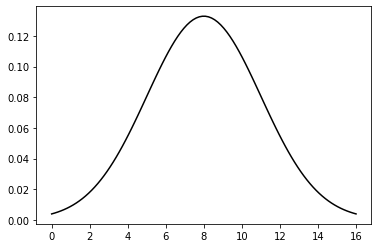

In [121]:
x_min = 0.0
x_max = 16.0

mean = 8.0 
std = 3.0

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='black')